<a href="https://colab.research.google.com/github/MohammadAliAfsahi/Machine-Learning-and-Deep-Learning/blob/master/Regression_What_is_the_under_hood%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
import numpy as np
import numpy.random as rnd

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn import datasets
from matplotlib.colors import ListedColormap

np.random.seed(42)

# Linear Regression

\begin{align}
\hat{y} & = h_θ(x) = θ^T . x \ \\
MSE(X,h_θ) & = \frac{ 1}{m}\sum_{i=1}^m (θ^T .x^{(i)} - y^{(i)} )^2 \\
\end{align}

# The Normal Equation

\begin{align}
\hat{θ} & = ( X^T . X )^{-1} . X^T . y \ \\
\end{align}

In [0]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1)

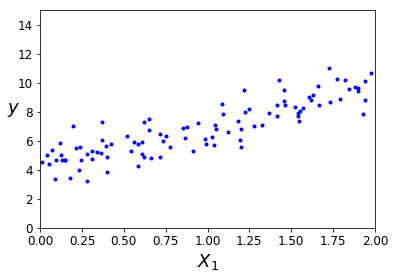

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0,15])
plt.show()

In [0]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

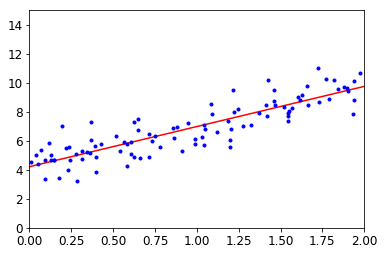

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
# equivalent code using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Intercept:\t', lin_reg.intercept_)
print('Coefficient:\t', lin_reg.coef_)
print("Prediction:")
lin_reg.predict(X_new)

Intercept:	 [4.21509616]
Coefficient:	 [[2.77011339]]
Prediction:


array([[4.21509616],
       [9.75532293]])

In [0]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) # computes pseudoinverse of X dot product by y

In [11]:
# to compute pseudoinverse directly...
np.linalg.pinv(X_b).dot(y) # you can see we got the same result as previous line

array([[4.21509616],
       [2.77011339]])

# Linear Regression using Batch Gradient Descent

\begin{align}
\frac{\partial }{\partial θ_ j} MSE(θ) = \frac{2}{m} \sum_{i=1}^m (θ^T . x^{(i)} -  y^{(i)})x^{(i)}_ j \ \\
\ \\
\nabla_θ MSE(θ) = \begin{bmatrix}
\frac{\partial }{\partial θ_ 0} MSE(θ) \ \\
\frac{\partial }{\partial θ_ 0} MSE(θ) \ \\
\vdots \ \\
\frac{\partial }{\partial θ_ 0} MSE(θ) \ \\
\end{bmatrix} = \frac{2}{m} X^T . (X.θ - y) \ \\
\ \\
θ^{(next step)} = θ - \eta \ \nabla_θ MSE(θ)
\end{align}

In [0]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # we use a random theta to start with in gradient descent

for itertaion in range(n_iterations):
  gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [0]:
theta_path_bgd = [] # batch gradient descent for different value of theta

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, 'b.')
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if iteration > 0 else 'r--'
      plt.plot(X_new, y_predict, style)
    
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
      
  plt.xlabel("$X_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)

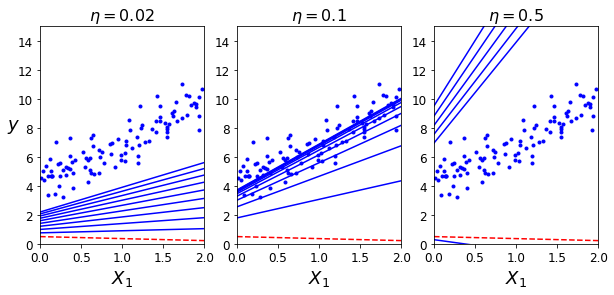

In [16]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02) # underfit

plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5) # overfit

plt.show()

# Stochastic Gradient Descent

In [0]:
theta_path_sgd = [] # stochastic gradient descent with different value of theta

m = len(X_b)

np.random.seed(42)


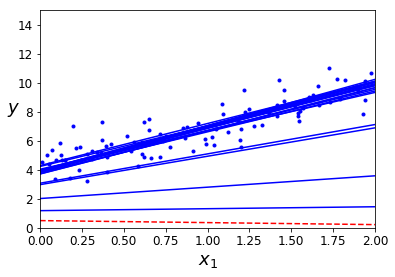

In [18]:
n_epochs = 50
t_0, t_1 = 5, 50

def learning_schedule(t):
  return t_0 / (t + t_1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                     
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()    


In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
print("SGD intercept:\t",sgd_reg.intercept_)
print("SGD coefficient:\t", sgd_reg.coef_)

SGD intercept:	 [4.16782089]
SGD coefficient:	 [2.72603052]


 # Mini Batch Gradient Descent

In [0]:
theta_path_mgd = [] # mini batch gradient descent with different value of theta

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t_0, t_1 = 200, 1000


def learning_schedule(t):
    return t_0 / (t + t_1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [0]:
theta_bgd = np.array(theta_path_bgd)
theta_sgd = np.array(theta_path_sgd)
theta_mgd = np.array(theta_path_mgd)

In [25]:
theta_bgd

array([[[1.78737583],
        [1.27927812]],

       [[2.55330471],
        [2.10402371]],

       [[3.01093601],
        [2.58105009]],

       ...,

       [[4.21509616],
        [2.77011339]],

       [[4.21509616],
        [2.77011339]],

       [[4.21509616],
        [2.77011339]]])

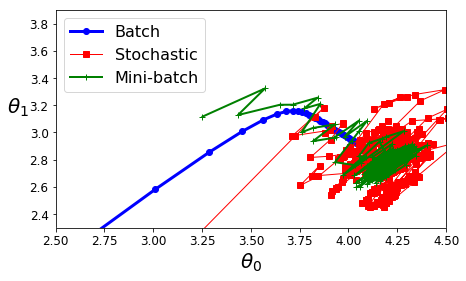

In [26]:
plt.figure(figsize=(7,4))

plt.plot(theta_bgd[:, 0], theta_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.plot(theta_sgd[:, 0], theta_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_mgd[:, 0], theta_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")

plt.legend(loc="upper left", fontsize=16)

plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

# Polynomial Regression

In [0]:
m = 100

X = 6 * np.random.rand(m, 1) - 3

y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

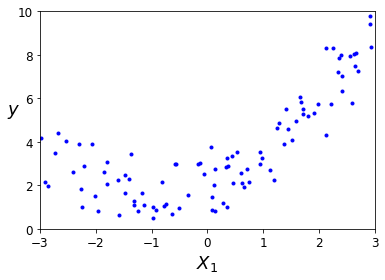

In [28]:
plt.plot(X, y, "b.")

plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.axis([-3, 3, 0, 10])

plt.show()

In [29]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X[0]

array([2.38942838])

In [30]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [0]:
lin_reg = LinearRegression()


In [32]:
lin_reg.fit(X_poly, y)

print("Linear Regression intercept:\t", lin_reg.intercept_)
print("Linear Regression coefficient:\t", lin_reg.coef_)

Linear Regression intercept:	 [1.9735233]
Linear Regression coefficient:	 [[0.95038538 0.52577032]]


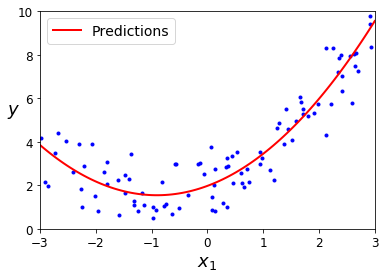

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)

plt.axis([-3, 3, 0, 10])

plt.show()

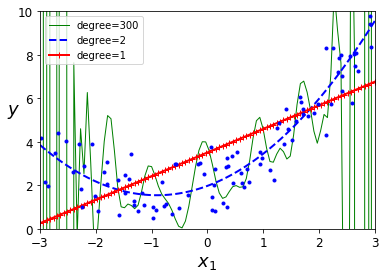

In [34]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)): # ploting polynomials with degree = 300, 2, 1

    polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("lin_reg", LinearRegression()),
        ])
    
    polynomial_regression.fit(X, y)
    
    
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label='degree='+str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)

plt.legend(loc="upper left")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.axis([-3, 3, 0, 10])

plt.show()

In [0]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): # as number of instances grows we want to see how model works
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

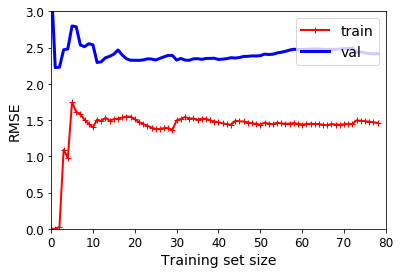

In [36]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)

plt.axis([0, 80, 0, 3])                         

plt.show()                                      
# here is the case of underfiting

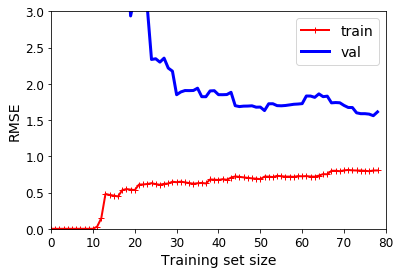

In [37]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])

plt.show()

# case of overfit

# Regularized models

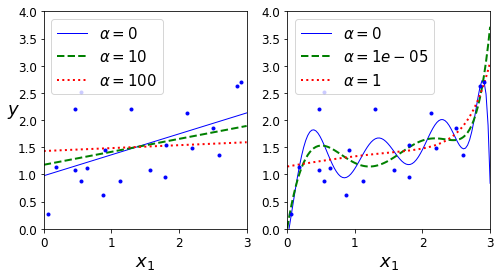

In [38]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
      
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        
        model.fit(X, y)
        
        y_new_regul = model.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)

plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

***Ridge regression cost function***
\begin{align}
J(θ) & = MSE(θ) + \alpha \frac{1}{2} \sum_{i=1}^n θ^2_i\ \\
\hat{θ} & = (X^T.X + \alpha A)^{-1}.X^T.y
\end{align}

In [39]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [40]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)

sgd_reg.fit(X, y.ravel()) # shape of y is 2-D however it should be one dimensional. y.ravel() does this

sgd_reg.predict([[1.5]])

array([1.49905184])

In [41]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)

ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[1.5507201]])

***Lasso regression cost function***
\begin{align}
J(θ) & = MSE(θ) + \alpha \frac{1}{2} \sum_{i=1}^n \begin{vmatrix}θ_i\end{vmatrix}\ \\
g(\ θ,J\ ) & = \nabla_θ MSE(θ) + \alpha \begin{bmatrix}
sign(θ_1) \ \\
sgin(θ_2) \ \\
\vdots \ \\
sign(θ_n)
\end{bmatrix} \ \  \ \ \ \ \ where \ \ \ \  sign(θ_i) = \begin{matrix}
-1 \ \ if \ \ θ_j < 0 \ \\
0 \ \ \ if \ \ θ_j = 0 \ \\
+1 \ \ if \ \ θ_j > 0 \ \\
\end{matrix}
\end{align}

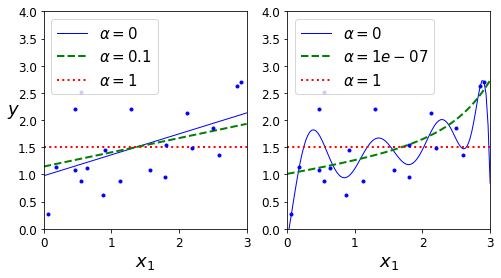

In [42]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)

plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

In [43]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([1.53788174])

***Elastic Net regression cost function***
\begin{align}
J(θ) & = MSE(θ) + r\alpha \frac{1}{2} \sum_{i=1}^n \begin{vmatrix}θ_i\end{vmatrix} + \frac{1 - r}{2} \alpha \frac{1}{2} \sum_{i=1}^n θ^2_i\ \\
\end{align}

In [44]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.54333232])

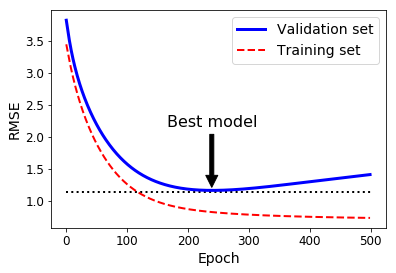

In [45]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None, eta0=0.0005, warm_start=True, learning_rate="constant", random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

    
best_epoch = np.argmin(val_errors)

best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model', xy=(best_epoch, best_val_rmse), xytext=(best_epoch, best_val_rmse + 1), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")

plt.legend(loc="upper right", fontsize=14)

plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [0]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")

best_epoch = None

best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [47]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [0]:
t_1_a, t_1_b, t_2_a, t_2_b = -1, 3, -1.5, 1.5

# ignoring bias term
t_1_s = np.linspace(t_1_a, t_1_b, 500)
t_2_s = np.linspace(t_2_a, t_2_b, 500)
t_1, t_2 = np.meshgrid(t_1_s, t_2_s)
T = np.c_[t_1.ravel(), t_2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t_1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t_1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t_1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t_1_min, t_2_min = t_1[t_min_idx], t_2[t_min_idx]

t_init = np.array([[0.25], [-1]])


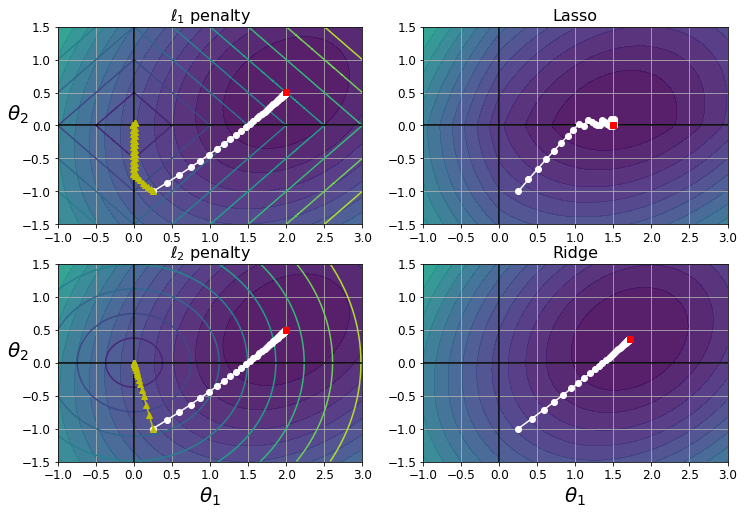

In [49]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    
    path = [theta]
    
    for iteration in range(n_iterations):
        
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        
        path.append(theta)
    
    return np.array(path)


plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t_1r_min, t_2r_min = t_1[tr_min_idx], t_2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t_1, t_2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t_1, t_2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t_1_min, t_2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t_1_a, t_1_b, t_2_a, t_2_b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t_1, t_2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t_1r_min, t_2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t_1_a, t_1_b, t_2_a, t_2_b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)


plt.show()

# Logistic Regression

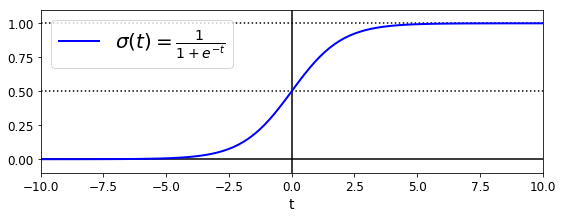

In [50]:
t = np.linspace(-10, 10, 100)

sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))

plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

plt.xlabel("t")

plt.legend(loc="upper left", fontsize=20)

plt.axis([-10, 10, -0.1, 1.1])

plt.show()

In [51]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [54]:
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

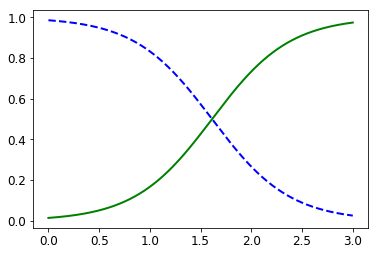

In [55]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

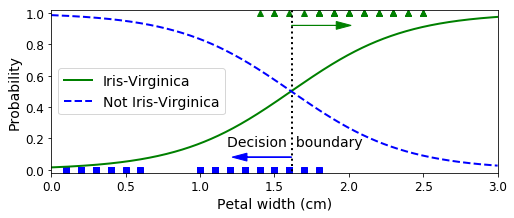

In [57]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [58]:
decision_boundary

array([1.61561562])

In [59]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [0]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

In [61]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1))

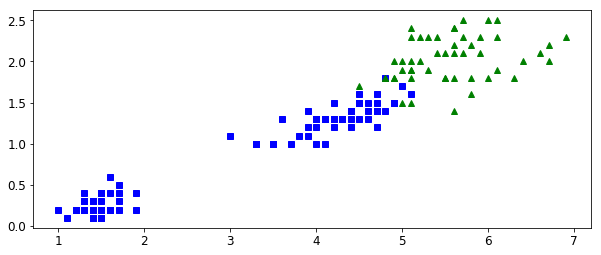

In [63]:
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")


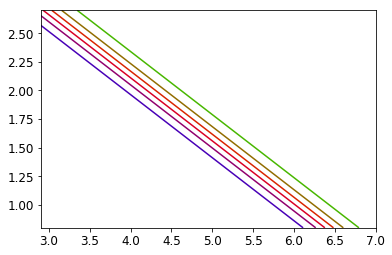

In [64]:
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

In [0]:
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

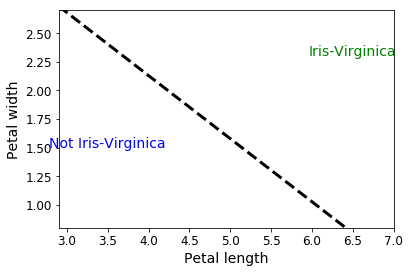

In [66]:
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()


In [67]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
x0, x1 = np.meshgrid( np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))

In [0]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [0]:
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

In [0]:
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

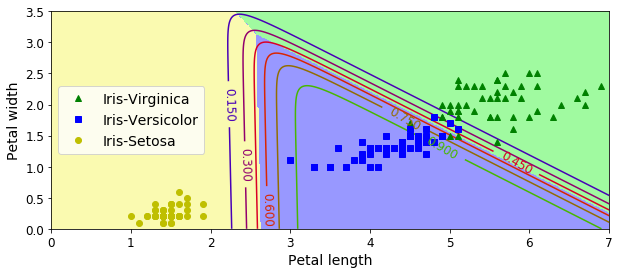

In [72]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [0]:
softmax_reg.predict([[5, 2]])

softmax_reg.predict_proba([[5, 2]])

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [0]:
np.random.seed(2042)

In [0]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [0]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [0]:
y_train[:10]

to_one_hot(y_train[:10])

Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [0]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums
  

In [79]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)


eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients
    

Theta


0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.42786510939287936
4500 0.41060071429187134
5000 0.3956780375390374


array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score


eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

In [81]:
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients


0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.48886433374493027
5000 0.48884031207388184


In [82]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score


1.0

In [83]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break
        

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285545
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [84]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [0]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

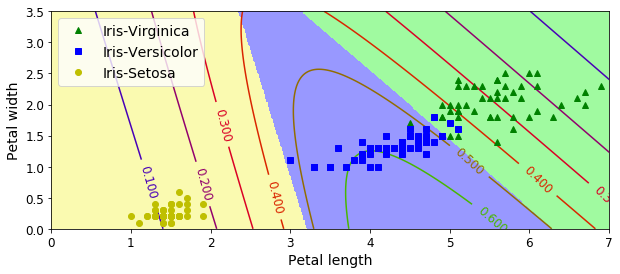

In [86]:
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [87]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333